In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

In [295]:
# Import dataframe
df = pd.read_excel('novak_djokovic_historial.xlsx')

In [296]:
# Transform Date to datetime
df['Date'] = pd.to_datetime(df['Date'].str.replace('‑', '-'), format='%d-%b-%Y')

In [297]:
# Clean result column before splitting
df['Result'] = df['Result'].str.replace(r'\([^)]*\)', '').str.replace(r'\[[^\]]*\]', '')

C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\3487770469.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Result'] = df['Result'].str.replace(r'\([^)]*\)', '').str.replace(r'\[[^\]]*\]', '')


In [298]:
# Split winner from loser in column result
split_columns = df['Result'].str.split(r'd\.', expand=True)
df['Winner'] = split_columns[0].str.replace('\xa0', '')
df['Loser'] = split_columns[1].str.replace('\xa0', '')


In [299]:
# Create winner flag
df['winner_flag'] = np.where(df['Winner'].str.contains('Djokovic'), 'Win', 'Lose')

In [300]:
# Count number of sets in the match
df['sets_number'] = df['Score'].str.count('-')

In [301]:
# All history
df.winner_flag.value_counts()

Win     1136
Lose     228
Name: winner_flag, dtype: int64

In [302]:
df.Tournament.sort_values().unique()

array(['Aachen CH', 'Acapulco', 'Adelaide', 'Adelaide 1', 'Amersfoort',
       'Astana', 'Atp Cup', 'Australian Open', 'Bangkok', 'Banja Luka',
       'Barcelona', 'Basel', 'Beijing', 'Beijing Olympics', 'Belgrade',
       'Belgrade 2', 'Belgrade CH', 'Bratislava CH', 'Brisbane',
       'Bucharest', 'Budapest CH', 'Canada Masters', 'Cherbourg CH',
       'Cincinnati Masters', 'Croatia F1', 'Croatia F2',
       'Davis Cup Finals QF: SRB vs KAZ',
       'Davis Cup Finals QF: SRB vs RUS',
       'Davis Cup Finals RR: FRA vs SRB',
       'Davis Cup Finals RR: SRB vs AUT',
       'Davis Cup Finals RR: SRB vs GER',
       'Davis Cup Finals RR: SRB vs JPN',
       'Davis Cup Finals SF: CRO vs SRB', 'Davis Cup G1 R1: ISR vs SCG',
       'Davis Cup G1 R1: SCG vs ZIM', 'Davis Cup G1 R2: GBR vs SCG',
       'Davis Cup G1 R2: SCG vs BEL', 'Davis Cup G1 R2: SRB vs GEO',
       'Davis Cup G2 R1: SCG vs LAT', 'Davis Cup WG F: SRB vs CZE',
       'Davis Cup WG F: SRB vs FRA', 'Davis Cup WG PO: SRB vs 

In [303]:
# Create column of grand_slam_flag
grand_slams = ['Roland Garros','Australian Open', 'US Open','Wimbledon']
df['grand_slam_flag'] = np.where(df['Tournament'].isin(grand_slams), True, False)

In [304]:
# Historial grand slams
df[df['grand_slam_flag']]['winner_flag'].value_counts()

Win     359
Lose     47
Name: winner_flag, dtype: int64

# Grand slam Analysis ##

## Historial general de partidos

In [305]:
df_grand_slam = df[df['grand_slam_flag']==True]

In [306]:
df_grand_slam_plot = df_grand_slam.groupby(['Tournament','winner_flag']).agg(result=('Winner','count')).reset_index()

In [307]:
# Calculate the total for each tournament
df_grand_slam_plot['Total'] = df_grand_slam_plot.groupby('Tournament')['result'].transform('sum')

# Calculate the percentage of Win and Lose for each tournament
df_grand_slam_plot['WIN LOSE PERCENTAGE'] = df_grand_slam_plot['result']/df_grand_slam_plot['Total'] * 100

# Check reuslts
df_grand_slam_plot

,Tournament,winner_flag,result,Total,WIN LOSE PERCENTAGE
0,Australian Open,Lose,8,100,8.000000
1,Australian Open,Win,92,100,92.000000
2,Roland Garros,Lose,16,112,14.285714
3,Roland Garros,Win,96,112,85.714286
4,US Open,Lose,13,95,13.684211
5,US Open,Win,82,95,86.315789
6,Wimbledon,Lose,10,99,10.101010
7,Wimbledon,Win,89,99,89.898990


In [308]:
df_grand_slam.winner_flag.value_counts()

Win     359
Lose     47
Name: winner_flag, dtype: int64

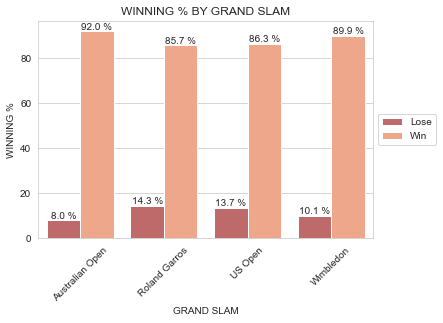

In [309]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C", "#FFA07A"])

# Create the bar chart
ax = sns.barplot(data=df_grand_slam_plot, x="Tournament", y="WIN LOSE PERCENTAGE", hue="winner_flag", palette=custom_palette)

# Add number labels to the bars with " %" format
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f} %", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("GRAND SLAM")
plt.ylabel("WINNING %")
plt.title("WINNING % BY GRAND SLAM")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [310]:
df_grand_slam

,Date,Tournament,Surface,Rd,Rk,vRk,Result,Score,More,TP,...,SP,1SP,2SP,vA,Time,Winner,Loser,winner_flag,sets_number,grand_slam_flag
0,2023-05-29,Roland Garros,Clay,F,3.0,4.0,Djokovic d. Casper Ruud,7-6(2) 6-3 7-5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Casper Ruud,Win,3,True
1,2023-05-29,Roland Garros,Clay,SF,3.0,1.0,Djokovic d. Carlos Alcaraz,6-3 5-7 6-1 6-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Carlos Alcaraz,Win,4,True
2,2023-05-29,Roland Garros,Clay,QF,3.0,11.0,Djokovic d. Karen Khachanov,4-6 7-6(0) 6-2 6-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Karen Khachanov,Win,4,True
3,2023-05-29,Roland Garros,Clay,R16,3.0,94.0,Djokovic d. Juan Pablo Varillas,6-3 6-2 6-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Juan Pablo Varillas,Win,3,True
4,2023-05-29,Roland Garros,Clay,R32,3.0,34.0,Djokovic d. Alejandro Davidovich Fokina,7-6(4) 7-6(5) 6-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Alejandro Davidovich Fokina,Win,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,2005-05-23,Roland Garros,Clay,Q1,153.0,182.0,Djokovic d. Glenn Weiner,6-2 6-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Glenn Weiner,Win,2,True
1298,2005-01-17,Australian Open,Hard,R128,188.0,4.0,Marat Safin d. Djokovic,6-0 6-2 6-1,(ch),117.0,...,66.0,39.0,27.0,1.0,0.051389,Marat Safin,Djokovic,Lose,3,True
1299,2005-01-17,Australian Open,Hard,Q3,188.0,138.0,Djokovic d. Wesley Moodie,4-6 6-3 6-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Wesley Moodie,Win,3,True
1300,2005-01-17,Australian Open,Hard,Q2,188.0,165.0,Djokovic d. Stan Wawrinka,6-3 6-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Stan Wawrinka,Win,2,True


### Con quienes perdió mas partidos en GS

In [311]:
df_gs_loses = df_grand_slam[df_grand_slam['winner_flag'] == 'Lose']
df_gs_loses_plot = df_gs_loses.groupby(['Winner']).agg(wins=('winner_flag','count')).reset_index().sort_values('wins', ascending=False)

In [312]:
df_gs_loses_plot

,Winner,wins
18,Rafael Nadal,11
19,Roger Federer,6
22,Stan Wawrinka,4
0,Andy Murray,2
23,Tomas Berdych,2
12,Marat Safin,2
4,Dominic Thiem,2
6,Guillermo Coria,1
16,Paul Goldstein,1
2,Daniil Medvedev,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


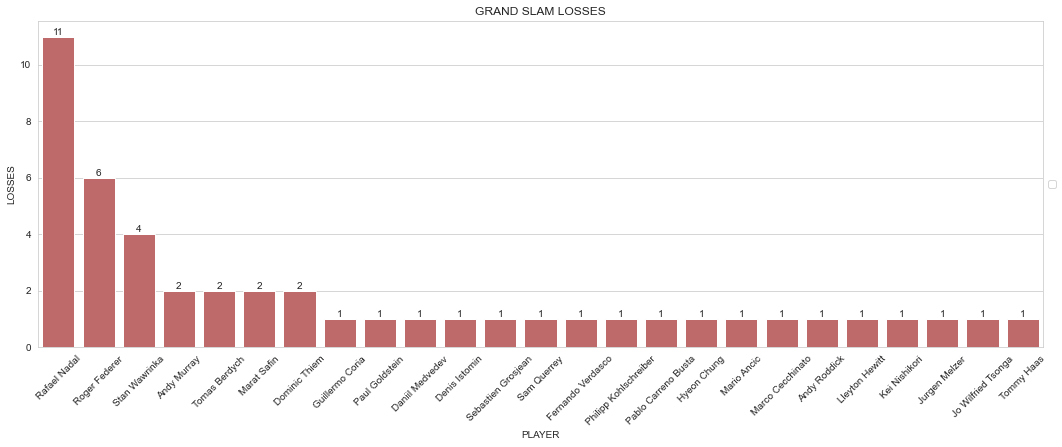

In [313]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C"])

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjust the width (10) and height (6) as desired

# Create the bar chart
ax = sns.barplot(data=df_gs_loses_plot, x="Winner", y="wins", palette=custom_palette)

# Add number labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("PLAYER")
plt.ylabel("LOSSES")
plt.title("GRAND SLAM LOSSES")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


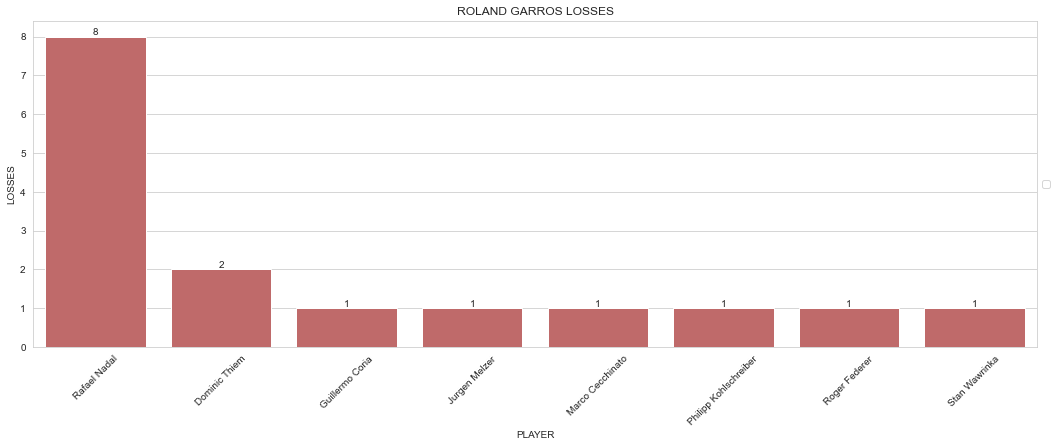

In [314]:
# Replicamos análisis para solamente ROLAND GARROS
df_gs_loses = df_grand_slam[(df_grand_slam['winner_flag'] == 'Lose')&(df_grand_slam['Tournament'] == 'Roland Garros')]
df_gs_loses_plot = df_gs_loses.groupby(['Winner']).agg(wins=('winner_flag','count')).reset_index().sort_values('wins', ascending=False)

# Define colours
custom_palette = sns.color_palette(["#CD5C5C"])

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjust the width (10) and height (6) as desired

# Create the bar chart
ax = sns.barplot(data=df_gs_loses_plot, x="Winner", y="wins", palette=custom_palette)

# Add number labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("PLAYER")
plt.ylabel("LOSSES")
plt.title("ROLAND GARROS LOSSES")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Mismo analisis para finales de GS

In [315]:
df_gs_finales = df[(df['grand_slam_flag']==True)&(df['Rd']=='F')]

In [316]:
df_gs_finales['winner_flag'].value_counts()

Win     23
Lose    11
Name: winner_flag, dtype: int64

In [317]:
df_grand_slam_plot = df_gs_finales.groupby(['Tournament','winner_flag']).agg(result=('Winner','count')).reset_index()

In [318]:
# Calculate the total for each tournament
df_grand_slam_plot['Total'] = df_grand_slam_plot.groupby('Tournament')['result'].transform('sum')

# Calculate the percentage of Win and Lose for each tournament
df_grand_slam_plot['WIN LOSE PERCENTAGE'] = df_grand_slam_plot['result']/df_grand_slam_plot['Total'] * 100

# Check reuslts
df_grand_slam_plot

,Tournament,winner_flag,result,Total,WIN LOSE PERCENTAGE
0,Australian Open,Win,10,10,100.000000
1,Roland Garros,Lose,4,7,57.142857
2,Roland Garros,Win,3,7,42.857143
3,US Open,Lose,6,9,66.666667
4,US Open,Win,3,9,33.333333
5,Wimbledon,Lose,1,8,12.500000
6,Wimbledon,Win,7,8,87.500000


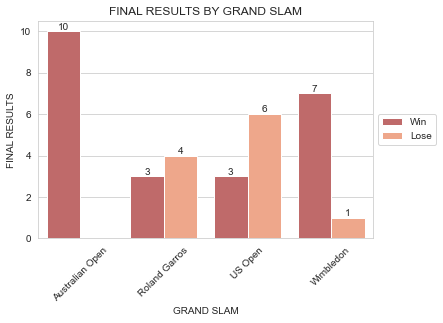

In [319]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C", "#FFA07A"])

# Create the bar chart
ax = sns.barplot(data=df_grand_slam_plot, x="Tournament", y="result", hue="winner_flag", palette=custom_palette)

# Add number labels to the bars with " %" format
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("GRAND SLAM")
plt.ylabel("FINAL RESULTS")
plt.title("FINAL RESULTS BY GRAND SLAM")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

### Con quienes perdió mas partidos en GS

In [320]:
df_gs_loses = df_gs_finales[df_gs_finales['winner_flag'] == 'Lose']
df_gs_loses_plot = df_gs_loses.groupby(['Winner']).agg(wins=('winner_flag','count')).reset_index().sort_values('wins', ascending=False)

In [321]:
df_gs_loses_plot

,Winner,wins
2,Rafael Nadal,5
0,Andy Murray,2
4,Stan Wawrinka,2
1,Daniil Medvedev,1
3,Roger Federer,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


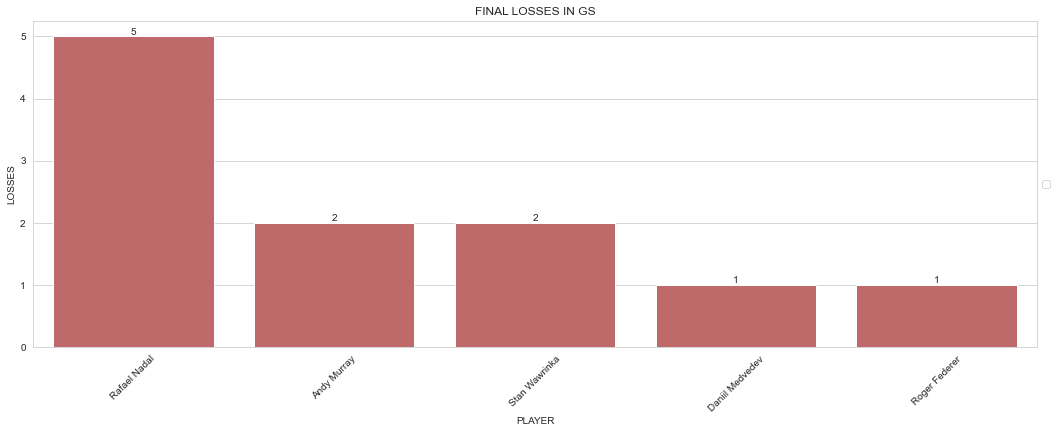

In [322]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C"])

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjust the width (10) and height (6) as desired

# Create the bar chart
ax = sns.barplot(data=df_gs_loses_plot, x="Winner", y="wins", palette=custom_palette)

# Add number labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("PLAYER")
plt.ylabel("LOSSES")
plt.title("FINAL LOSSES IN GS")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [323]:
df_grand_slam = df[df['grand_slam_flag']==True]

In [324]:
df_grand_slam_plot = df_grand_slam.groupby(['Tournament','winner_flag']).agg(result=('Winner','count')).reset_index()

In [325]:
# Calculate the total for each tournament
df_grand_slam_plot['Total'] = df_grand_slam_plot.groupby('Tournament')['result'].transform('sum')

# Calculate the percentage of Win and Lose for each tournament
df_grand_slam_plot['WIN LOSE PERCENTAGE'] = df_grand_slam_plot['result']/df_grand_slam_plot['Total'] * 100

# Check reuslts
df_grand_slam_plot

,Tournament,winner_flag,result,Total,WIN LOSE PERCENTAGE
0,Australian Open,Lose,8,100,8.000000
1,Australian Open,Win,92,100,92.000000
2,Roland Garros,Lose,16,112,14.285714
3,Roland Garros,Win,96,112,85.714286
4,US Open,Lose,13,95,13.684211
5,US Open,Win,82,95,86.315789
6,Wimbledon,Lose,10,99,10.101010
7,Wimbledon,Win,89,99,89.898990


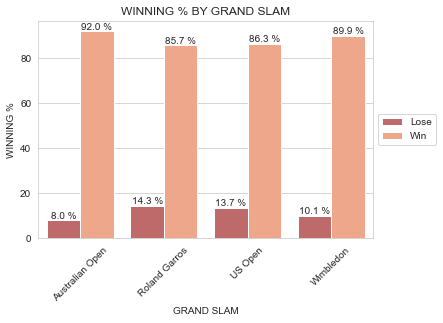

In [326]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C", "#FFA07A"])

# Create the bar chart
ax = sns.barplot(data=df_grand_slam_plot, x="Tournament", y="WIN LOSE PERCENTAGE", hue="winner_flag", palette=custom_palette)

# Add number labels to the bars with " %" format
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f} %", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("GRAND SLAM")
plt.ylabel("WINNING %")
plt.title("WINNING % BY GRAND SLAM")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [327]:
df_grand_slam

,Date,Tournament,Surface,Rd,Rk,vRk,Result,Score,More,TP,...,SP,1SP,2SP,vA,Time,Winner,Loser,winner_flag,sets_number,grand_slam_flag
0,2023-05-29,Roland Garros,Clay,F,3.0,4.0,Djokovic d. Casper Ruud,7-6(2) 6-3 7-5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Casper Ruud,Win,3,True
1,2023-05-29,Roland Garros,Clay,SF,3.0,1.0,Djokovic d. Carlos Alcaraz,6-3 5-7 6-1 6-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Carlos Alcaraz,Win,4,True
2,2023-05-29,Roland Garros,Clay,QF,3.0,11.0,Djokovic d. Karen Khachanov,4-6 7-6(0) 6-2 6-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Karen Khachanov,Win,4,True
3,2023-05-29,Roland Garros,Clay,R16,3.0,94.0,Djokovic d. Juan Pablo Varillas,6-3 6-2 6-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Juan Pablo Varillas,Win,3,True
4,2023-05-29,Roland Garros,Clay,R32,3.0,34.0,Djokovic d. Alejandro Davidovich Fokina,7-6(4) 7-6(5) 6-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Alejandro Davidovich Fokina,Win,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,2005-05-23,Roland Garros,Clay,Q1,153.0,182.0,Djokovic d. Glenn Weiner,6-2 6-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Glenn Weiner,Win,2,True
1298,2005-01-17,Australian Open,Hard,R128,188.0,4.0,Marat Safin d. Djokovic,6-0 6-2 6-1,(ch),117.0,...,66.0,39.0,27.0,1.0,0.051389,Marat Safin,Djokovic,Lose,3,True
1299,2005-01-17,Australian Open,Hard,Q3,188.0,138.0,Djokovic d. Wesley Moodie,4-6 6-3 6-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Wesley Moodie,Win,3,True
1300,2005-01-17,Australian Open,Hard,Q2,188.0,165.0,Djokovic d. Stan Wawrinka,6-3 6-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Djokovic,Stan Wawrinka,Win,2,True


### Con quienes perdió mas partidos en GS

In [328]:
df_gs_loses = df_grand_slam[df_grand_slam['winner_flag'] == 'Lose']
df_gs_loses_plot = df_gs_loses.groupby(['Winner']).agg(wins=('winner_flag','count')).reset_index().sort_values('wins', ascending=False)

In [329]:
df_gs_loses_plot

,Winner,wins
18,Rafael Nadal,11
19,Roger Federer,6
22,Stan Wawrinka,4
0,Andy Murray,2
23,Tomas Berdych,2
12,Marat Safin,2
4,Dominic Thiem,2
6,Guillermo Coria,1
16,Paul Goldstein,1
2,Daniil Medvedev,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


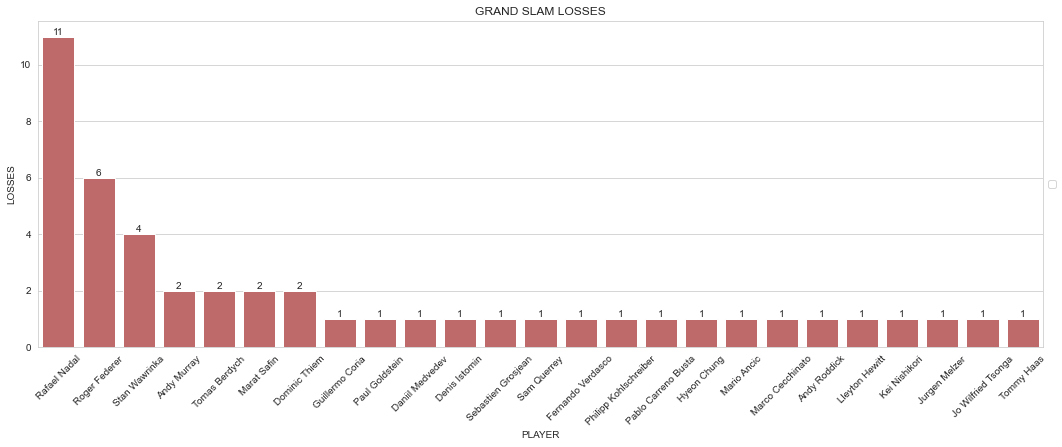

In [330]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C"])

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjust the width (10) and height (6) as desired

# Create the bar chart
ax = sns.barplot(data=df_gs_loses_plot, x="Winner", y="wins", palette=custom_palette)

# Add number labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("PLAYER")
plt.ylabel("LOSSES")
plt.title("GRAND SLAM LOSSES")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## Historial en finales de GS

In [331]:
df_gs_finales = df[(df['grand_slam_flag']==True)&(df['Rd']=='F')]

In [332]:
df_gs_finales.shape

(34, 22)

In [333]:
df_gs_finales['rival'] = np.where(df_gs_finales['winner_flag']=='Win', df_gs_finales['Loser'], df_gs_finales['Winner'])

C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\624165232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs_finales['rival'] = np.where(df_gs_finales['winner_flag']=='Win', df_gs_finales['Loser'], df_gs_finales['Winner'])


In [334]:
df_historial = df_gs_finales.groupby(['rival','winner_flag']).agg(historial=('Tournament','count')).reset_index().sort_values('rival')
df_historial['total'] = df_historial.groupby(['rival'])['historial'].transform('sum')
df_historial = df_historial.sort_values(by=['winner_flag'], ascending=False).sort_values(by=['total','rival'], ascending=False)

In [335]:
df_historial.head()

,rival,winner_flag,historial,total
12,Rafael Nadal,Win,4,9
11,Rafael Nadal,Lose,5,9
1,Andy Murray,Win,5,7
0,Andy Murray,Lose,2,7
14,Roger Federer,Win,4,5


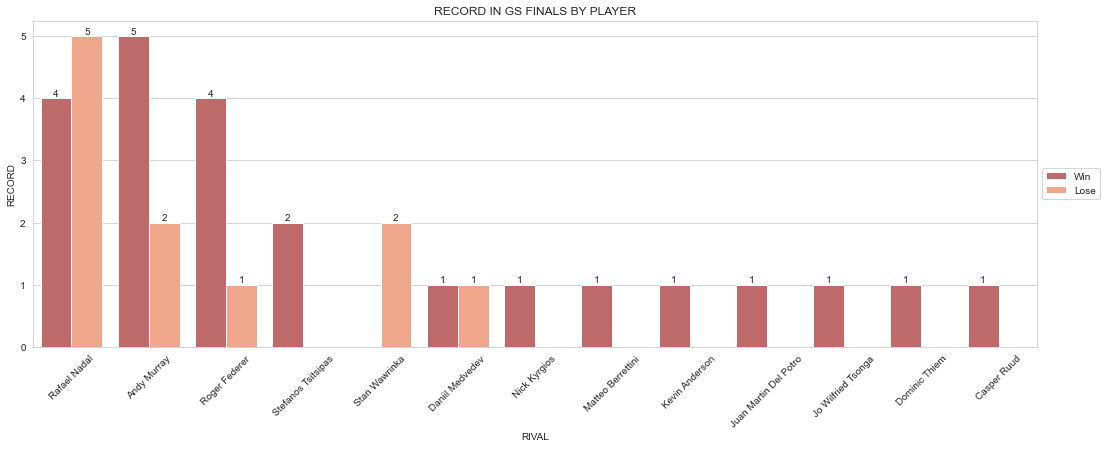

In [336]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C", "#FFA07A"])

# Adjust size
plt.figure(figsize=(18, 6))  # Adjust the width (10) and height (6) as desired


# Create the bar chart
ax = sns.barplot(data=df_historial, x="rival", y="historial", hue="winner_flag", palette=custom_palette)

# Add number labels to the bars with " %" format
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("RIVAL")
plt.ylabel("RECORD")
plt.title("RECORD IN GS FINALS BY PLAYER")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Probabilidades por set

In [337]:
df_grand_slam = df[df['grand_slam_flag']==True]

In [338]:
df_grand_slam.winner_flag.value_counts()

Win     359
Lose     47
Name: winner_flag, dtype: int64

In [339]:
df_sets = df_grand_slam.groupby(['winner_flag']).agg(general_score=('Tournament','count')).reset_index().sort_values(by='winner_flag', ascending=False)

df_sets['total'] = df_sets['general_score'].sum()

df_sets['general_percentage'] = df_sets['general_score']/df_sets['total'] * 100

df_sets['STATE'] = 'TOTAL'

df_sets

,winner_flag,general_score,total,general_percentage,STATE
1,Win,359,406,88.423645,TOTAL
0,Lose,47,406,11.576355,TOTAL


In [340]:
# flag de ganar el primer set
# Split the string column on the first occurrence of '-'
split_data = df_grand_slam['Score'].str.split('-', n=1, expand=True)

# Extract the characters before '-' and save them in a new column
df_grand_slam['games_1_first_set'] = split_data[0].str[-1]

# Extract the characters after '-' and save them in another new column
df_grand_slam['games_2_first_set'] = split_data[1].str[0]

C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\331233746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grand_slam['games_1_first_set'] = split_data[0].str[-1]
C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\331233746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grand_slam['games_2_first_set'] = split_data[1].str[0]


In [341]:
condlist = [(df_grand_slam['games_1_first_set'] > df_grand_slam['games_2_first_set']) & (df_grand_slam['winner_flag']=='Win'),
            (df_grand_slam['games_1_first_set'] < df_grand_slam['games_2_first_set']) & (df_grand_slam['winner_flag']=='Lose')]
choicelist = [True, True]

In [342]:
df_grand_slam['first_set_winner'] = np.select(condlist, choicelist, False)

C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\1661572181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grand_slam['first_set_winner'] = np.select(condlist, choicelist, False)


In [343]:
df_sets_1 = df_grand_slam[df_grand_slam['first_set_winner']==True].groupby(['winner_flag']).agg(general_score=('Tournament','count')).reset_index().sort_values(by='winner_flag', ascending=False)

df_sets_1['total'] = df_sets_1['general_score'].sum()

df_sets_1['general_percentage'] = df_sets_1['general_score']/df_sets_1['total'] * 100

df_sets_1['STATE'] = 'FIRST SET WINNER'

df_sets_1

,winner_flag,general_score,total,general_percentage,STATE
1,Win,309,317,97.476341,FIRST SET WINNER
0,Lose,8,317,2.523659,FIRST SET WINNER


In [349]:
# Analisis del ganador del segundo set
# flag de ganar el segundo set
# Split the string column on the first occurrence of '-'
split_data = df_grand_slam['Score'].str.split('-', n=2, expand=True)

# Extract the characters before '-' and save them in a new column
df_grand_slam['games_1_second_set'] = split_data[1].str[-1]

# Extract the characters after '-' and save them in another new column
df_grand_slam['games_2_second_set'] = split_data[2].str[0]

condlist = [(df_grand_slam['games_1_second_set'] > df_grand_slam['games_2_second_set']) & (df_grand_slam['winner_flag']=='Win'),
            (df_grand_slam['games_1_second_set'] < df_grand_slam['games_2_second_set']) & (df_grand_slam['winner_flag']=='Lose')]
choicelist = [True, True]

df_grand_slam['second_set_winner'] = np.select(condlist, choicelist, False)

C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\868411757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grand_slam['games_1_second_set'] = split_data[1].str[-1]
C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\868411757.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grand_slam['games_2_second_set'] = split_data[2].str[0]
C:\Users\m.duran\AppData\Local\Temp\ipykernel_84504\868411757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [350]:
df_grand_slam

,Date,Tournament,Surface,Rd,Rk,vRk,Result,Score,More,TP,...,Loser,winner_flag,sets_number,grand_slam_flag,games_1_first_set,games_2_first_set,first_set_winner,games_1_second_set,games_2_second_set,second_set_winner
0,2023-05-29,Roland Garros,Clay,F,3.0,4.0,Djokovic d. Casper Ruud,7-6(2) 6-3 7-5,NaN,NaN,...,Casper Ruud,Win,3,True,7,6,True,6,3,True
1,2023-05-29,Roland Garros,Clay,SF,3.0,1.0,Djokovic d. Carlos Alcaraz,6-3 5-7 6-1 6-1,NaN,NaN,...,Carlos Alcaraz,Win,4,True,6,3,True,5,7,False
2,2023-05-29,Roland Garros,Clay,QF,3.0,11.0,Djokovic d. Karen Khachanov,4-6 7-6(0) 6-2 6-4,NaN,NaN,...,Karen Khachanov,Win,4,True,4,6,False,7,6,True
3,2023-05-29,Roland Garros,Clay,R16,3.0,94.0,Djokovic d. Juan Pablo Varillas,6-3 6-2 6-2,NaN,NaN,...,Juan Pablo Varillas,Win,3,True,6,3,True,6,2,True
4,2023-05-29,Roland Garros,Clay,R32,3.0,34.0,Djokovic d. Alejandro Davidovich Fokina,7-6(4) 7-6(5) 6-2,NaN,NaN,...,Alejandro Davidovich Fokina,Win,3,True,7,6,True,7,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,2005-05-23,Roland Garros,Clay,Q1,153.0,182.0,Djokovic d. Glenn Weiner,6-2 6-3,NaN,NaN,...,Glenn Weiner,Win,2,True,6,2,True,6,3,True
1298,2005-01-17,Australian Open,Hard,R128,188.0,4.0,Marat Safin d. Djokovic,6-0 6-2 6-1,(ch),117.0,...,Djokovic,Lose,3,True,6,0,False,6,2,False
1299,2005-01-17,Australian Open,Hard,Q3,188.0,138.0,Djokovic d. Wesley Moodie,4-6 6-3 6-4,NaN,NaN,...,Wesley Moodie,Win,3,True,4,6,False,6,3,True
1300,2005-01-17,Australian Open,Hard,Q2,188.0,165.0,Djokovic d. Stan Wawrinka,6-3 6-1,NaN,NaN,...,Stan Wawrinka,Win,2,True,6,3,True,6,1,True


In [351]:
df_sets_2 = df_grand_slam[(df_grand_slam['first_set_winner']==True)&(df_grand_slam['second_set_winner']==True)].groupby(['winner_flag']).agg(general_score=('Tournament','count')).reset_index().sort_values(by='winner_flag', ascending=False)

df_sets_2['total'] = df_sets_2['general_score'].sum()

df_sets_2['general_percentage'] = df_sets_2['general_score']/df_sets_2['total'] * 100

df_sets_2['STATE'] = 'FIRST 2 SETS WINNER'

df_sets_2

,winner_flag,general_score,total,general_percentage,STATE
1,Win,258,259,99.6139,FIRST 2 SETS WINNER
0,Lose,1,259,0.3861,FIRST 2 SETS WINNER


In [352]:
df_sets_total = pd.concat([df_sets, df_sets_1, df_sets_2], ignore_index=True)

# Print the concatenated DataFrame
df_sets_total

,winner_flag,general_score,total,general_percentage,STATE
0,Win,359,406,88.423645,TOTAL
1,Lose,47,406,11.576355,TOTAL
2,Win,309,317,97.476341,FIRST SET WINNER
3,Lose,8,317,2.523659,FIRST SET WINNER
4,Win,258,259,99.613900,FIRST 2 SETS WINNER
5,Lose,1,259,0.386100,FIRST 2 SETS WINNER


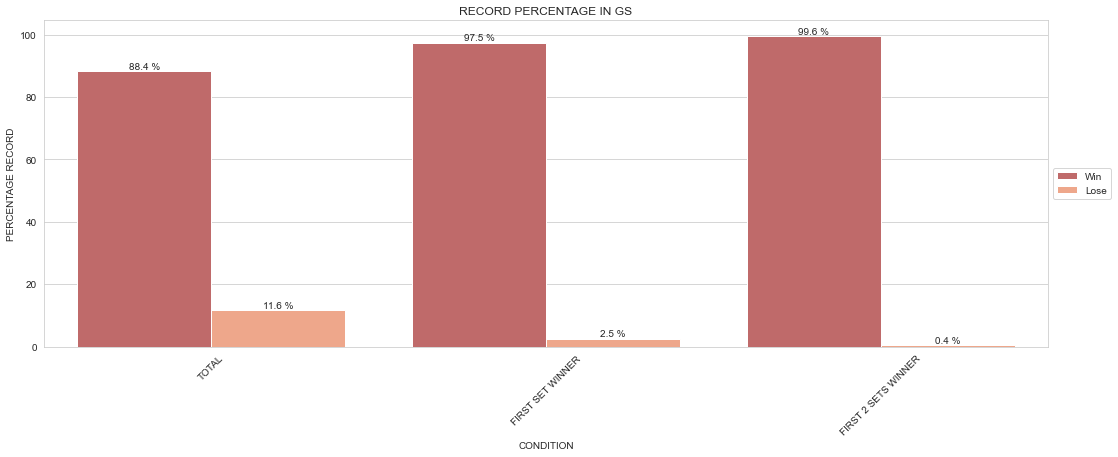

In [354]:
# Define colours
custom_palette = sns.color_palette(["#CD5C5C", "#FFA07A"])

# Adjust size
plt.figure(figsize=(18, 6))  # Adjust the width (10) and height (6) as desired


# Create the bar chart
ax = sns.barplot(data=df_sets_total, x="STATE", y="general_percentage", hue="winner_flag", palette=custom_palette)

# Add number labels to the bars with " %" format
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f} %", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Add labels and title
plt.xlabel("CONDITION")
plt.ylabel("PERCENTAGE RECORD")
plt.title("RECORD PERCENTAGE IN GS")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [356]:
df_grand_slam[(df_grand_slam['first_set_winner']==True)&(df_grand_slam['second_set_winner']==True)&(df_grand_slam['winner_flag']=='Lose')]

,Date,Tournament,Surface,Rd,Rk,vRk,Result,Score,More,TP,...,Loser,winner_flag,sets_number,grand_slam_flag,games_1_first_set,games_2_first_set,first_set_winner,games_1_second_set,games_2_second_set,second_set_winner
899,2010-05-24,Roland Garros,Clay,QF,3.0,27.0,Jurgen Melzer d. Djokovic,3-6 2-6 6-2 7-6(3) 6-4,NaN,342.0,...,Djokovic,Lose,5,True,3,6,True,2,6,True
